In [1]:
import pandas as pd

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
fig_size = (12, 4)
start_date = '1970-01-02'
today = datetime.today().strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')
five_years = (datetime.today()-relativedelta(years=5)).strftime('%Y-%m-%d')
ten_years = (datetime.today()-relativedelta(years=10)).strftime('%Y-%m-%d')

In [3]:
def get_dma_analysis(ticker, start_date=start_date, end_date=datetime.today().strftime('%Y-%m-%d'), ma_period=200):
    df = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()
    df['DMA'] = df['Close'].rolling(ma_period).mean()
    df['PCH_DMA'] = 100*(df['Close']-df['DMA'])/df['DMA']
    df['PCH_DMA_MEAN'] = df['PCH_DMA'].mean()
    df['PCH_DMA_MEDIAN'] = df['PCH_DMA'].median()
    df = df.round(3)
    print('Start', df[['Date', 'Close']].set_index('Date').head(1).transpose())
    print('\nEnd', df[['Date', 'Close', 'DMA', 'PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN']].set_index('Date').tail(1).transpose())
    return df
        
def plot_dma_analysis(df, start_date=start_date, end_date=datetime.today().strftime('%Y-%m-%d'), title=''):
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['Close', 'DMA'], style = ['-', '--'],
        figsize=fig_size, grid=True, title=title)
    df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].plot(
        x='Date', y=['PCH_DMA', 'PCH_DMA_MEAN', 'PCH_DMA_MEDIAN'], style=['-', '--', '--'],
        figsize=fig_size, grid=True, title=title)
    
def plot_dma_hist(df, bins=100, title=''):
    df.plot(
        x='Date', y=['PCH_DMA'], kind='hist', bins=bins,
        figsize=fig_size, grid=True, title=title)
    
def get_dma_percentile(df, bins=100):
    current_pch_dma_rank_percentile = round(100*df['PCH_DMA'].dropna().rank(axis=0).tail(1).values[0]/len(df['PCH_DMA'].dropna()), 2)
    print('Current PCH DMA percentile:', current_pch_dma_rank_percentile)
    return(current_pch_dma_rank_percentile)

Start Date   1970-01-02
Close        93.0

End Date            2020-12-09
Close             3672.820
DMA               3167.034
PCH_DMA             15.970
PCH_DMA_MEAN         3.120
PCH_DMA_MEDIAN       4.026
Current PCH DMA percentile: 96.58


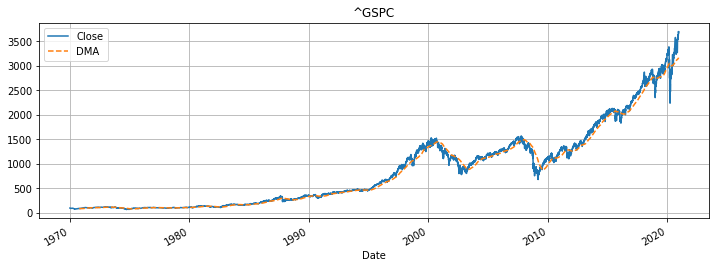

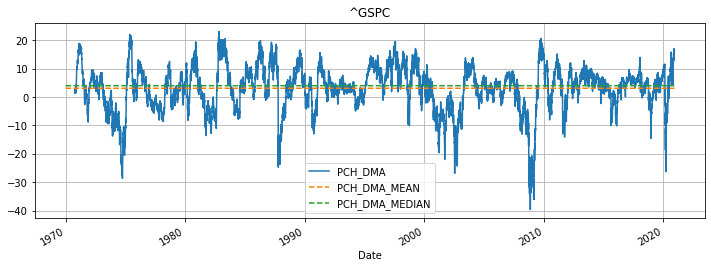

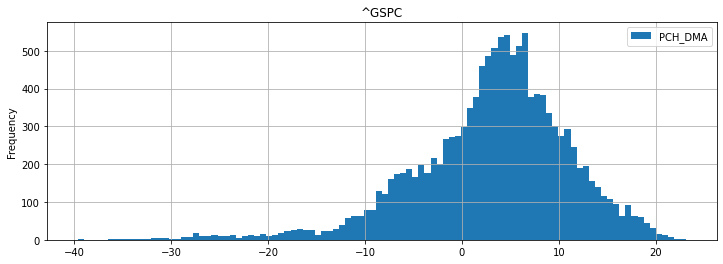

In [4]:
ticker = '^GSPC'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2009-11-23
Close       60.03

End Date            2020-12-09
Close               61.960
DMA                 62.109
PCH_DMA             -0.240
PCH_DMA_MEAN         0.106
PCH_DMA_MEDIAN       0.038
Current PCH DMA percentile: 17.89


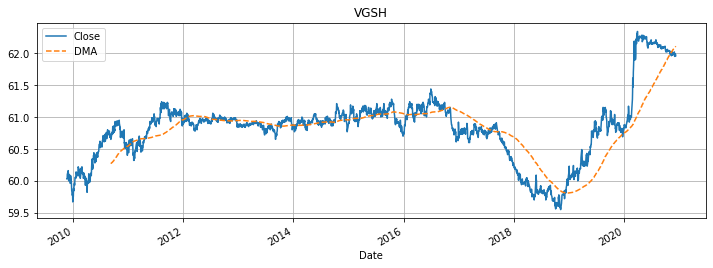

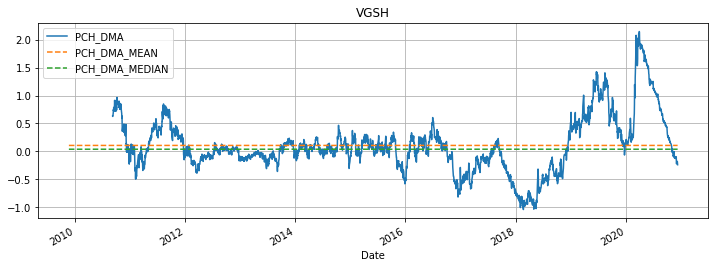

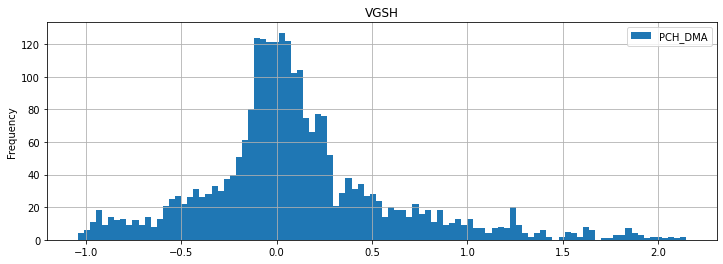

In [11]:
ticker = 'VGSH'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2007-01-11
Close       108.7

End Date            2020-12-09
Close              110.520
DMA                110.755
PCH_DMA             -0.212
PCH_DMA_MEAN         0.034
PCH_DMA_MEDIAN       0.010
Current PCH DMA percentile: 0.21


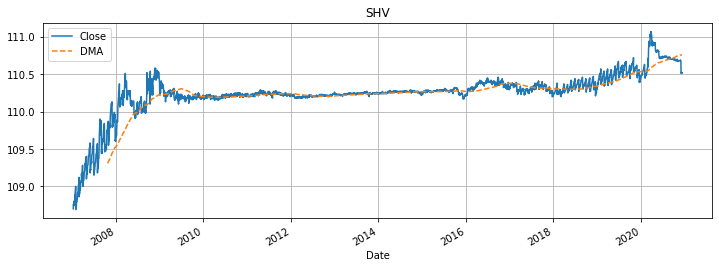

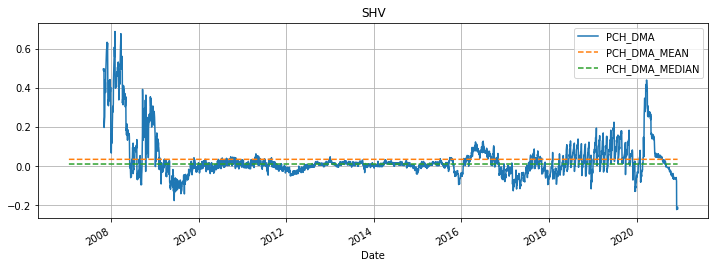

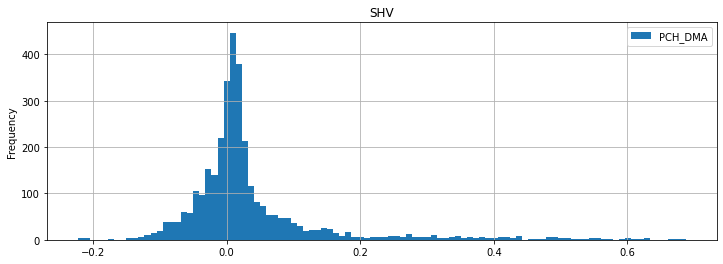

In [10]:
ticker = 'SHV'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2009-11-23
Close       75.26

End Date            2020-12-09
Close               82.950
DMA                 81.916
PCH_DMA              1.262
PCH_DMA_MEAN         0.281
PCH_DMA_MEDIAN       0.274
Current PCH DMA percentile: 83.04


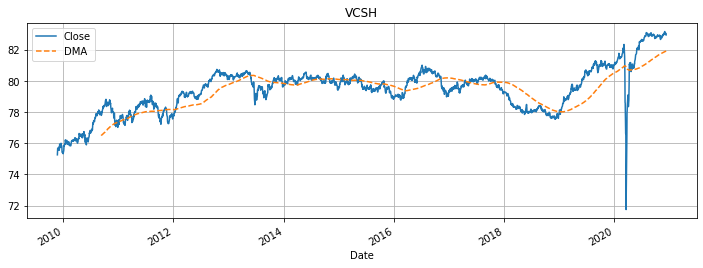

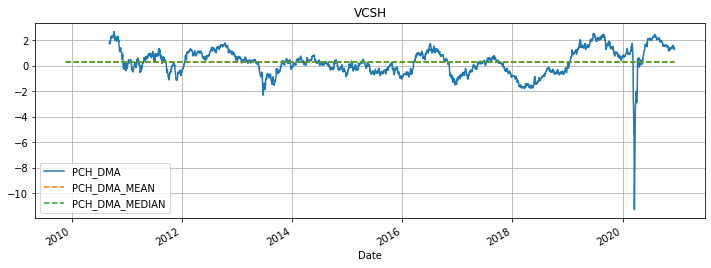

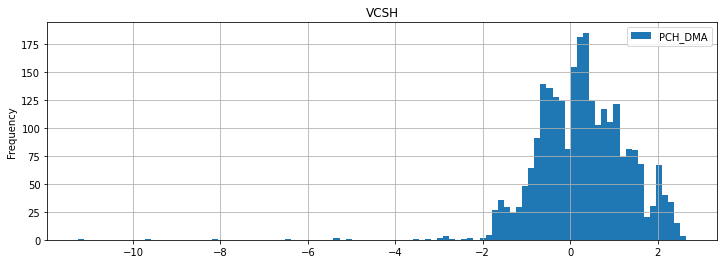

In [5]:
ticker = 'VCSH'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2007-09-17
Close     4494.65

End Date            2020-12-10
Close            13420.750
DMA              10797.186
PCH_DMA             24.299
PCH_DMA_MEAN         3.046
PCH_DMA_MEDIAN       4.106
Current PCH DMA percentile: 96.31


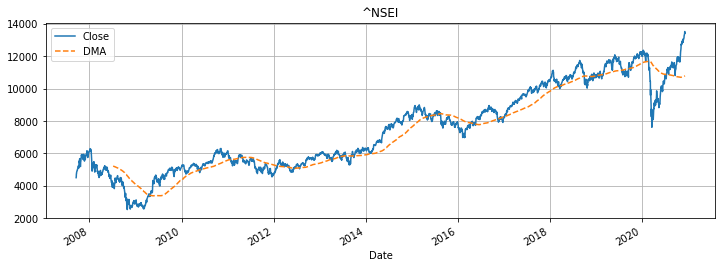

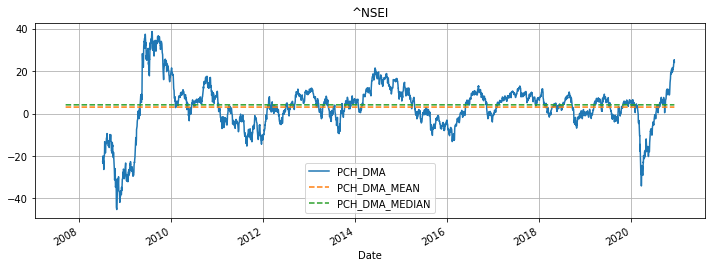

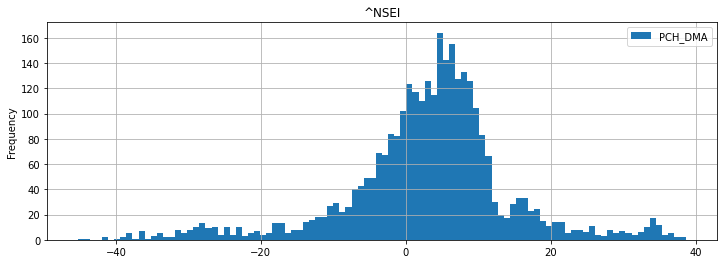

In [6]:
ticker = '^NSEI'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   2003-12-01
Close       45.71

End Date            2020-12-10
Close               73.665
DMA                 74.894
PCH_DMA             -1.641
PCH_DMA_MEAN         1.215
PCH_DMA_MEDIAN       0.623
Current PCH DMA percentile: 24.57


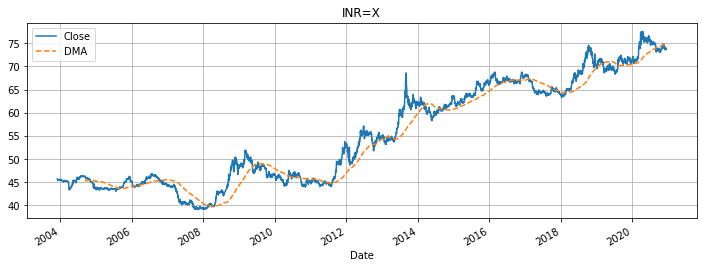

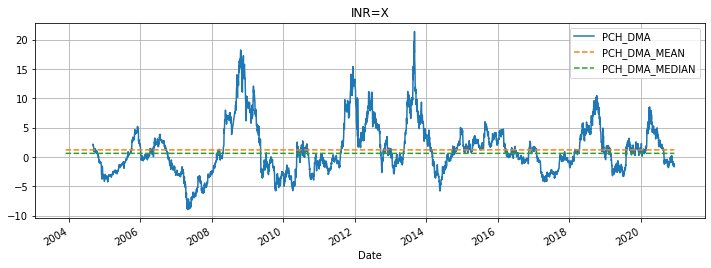

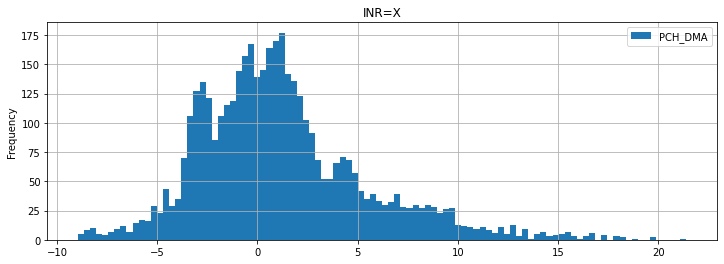

In [7]:
ticker = 'INR=X'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   1970-01-02
Close       1.938

End Date            2020-12-09
Close               42.800
DMA                 40.961
PCH_DMA              4.489
PCH_DMA_MEAN         2.616
PCH_DMA_MEDIAN       2.799
Current PCH DMA percentile: 58.53


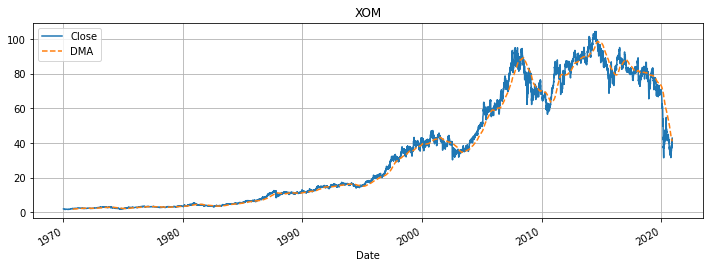

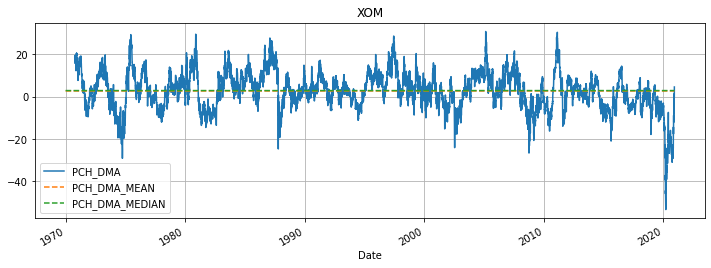

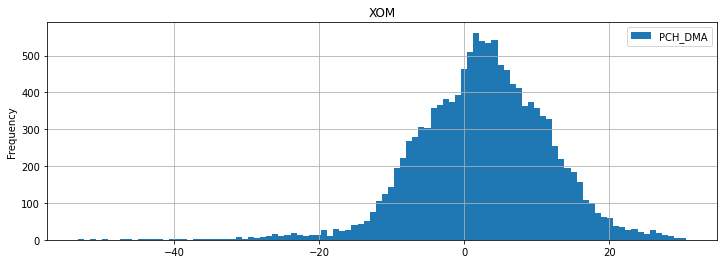

In [8]:
ticker = 'XOM'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)

Start Date   1997-05-15
Close       1.958

End Date            2020-12-09
Close             3104.200
DMA               2775.300
PCH_DMA             11.851
PCH_DMA_MEAN        14.138
PCH_DMA_MEDIAN      11.502
Current PCH DMA percentile: 50.75


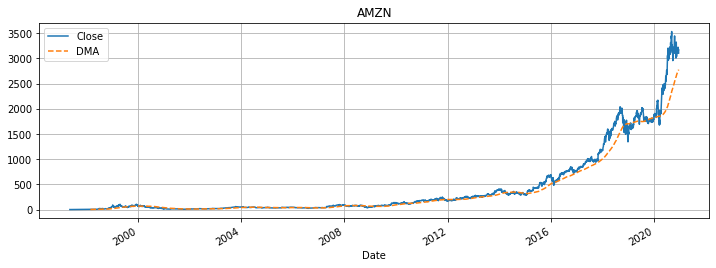

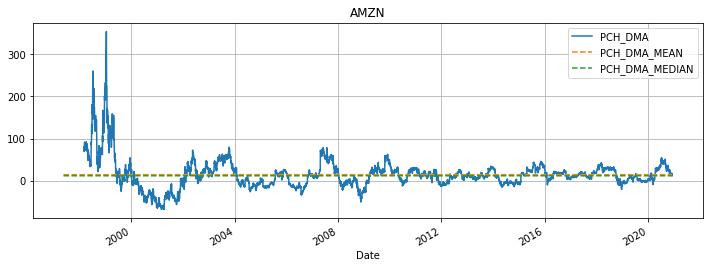

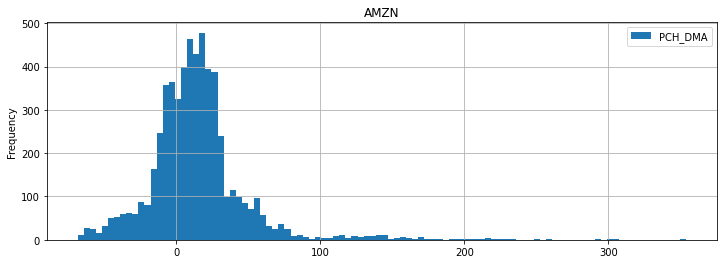

In [9]:
ticker = 'AMZN'
df = get_dma_analysis(ticker=ticker)
plot_dma_analysis(df, start_date=start_date, title=ticker)
get_dma_percentile(df)
plot_dma_hist(df, title=ticker)